In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#creating connection to SQlite database
connection = sqlite3.connect("student_grades.db")

#checking for success
print("Database on")

Database on


In [4]:
#creating cursor
cursor = connection.cursor()

In [9]:
#student table
print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    students_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

Cursor created!


In [12]:
#grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  students_id INTEGER,  -- changed to students_id to match the students table
  subject TEXT,
  grade INTEGER,
  FOREIGN KEY (students_id) REFERENCES students(students_id)  -- corrected column name
)
''')
print("Success")

Success


In [16]:
students_data = [
( "Alice", "Johnson"),
( "Bob", "Smith"),
( "Carol", "White"),
( "David", "Brown"),
( "Eve", "Davis")
]

In [27]:
# Sample data to insert into the sales table
grades_data = [
(1, 'Math', 95),
(1, 'English', 88),
(1, 'History', 90),
(2, 'Math', 82),
(2, 'English', 76),
(2, 'History', 85),
(3, 'Math', 89),
(3, 'English', 92),
(3, 'Science', 87),
(4, 'Math', 77),
(4, 'English', 81),
(4, 'History', 84),
(5, 'Math', 91),
(5, 'English', 86),
(5, 'Science', 93)
]

In [28]:
cursor.executemany('''
INSERT INTO grades (students_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)
connection.commit()
print("Data inserted into the sales table!")

Data inserted into the sales table!


In [19]:
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)
connection.commit()
print("Data inserted into the sales table!")

Data inserted into the sales table!


In [29]:
#1. Retrieve all students' names and their grades.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.students_id = grades.students_id;
''')
cursor.fetchall()

[('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'English', 88),
 ('Alice', 'Johnson', 'History', 90),
 ('Bob', 'Smith', 'Math', 82),
 ('Bob', 'Smith', 'English', 76),
 ('Bob', 'Smith', 'History', 85),
 ('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'English', 88),
 ('Alice', 'Johnson', 'History', 90),
 ('Bob', 'Smith', 'Math', 82),
 ('Bob', 'Smith', 'English', 76),
 ('Bob', 'Smith', 'History', 85),
 ('Carol', 'White', 'Math', 89),
 ('Carol', 'White', 'English', 92),
 ('Carol', 'White', 'Science', 87),
 ('David', 'Brown', 'Math', 77),
 ('David', 'Brown', 'English', 81),
 ('David', 'Brown', 'History', 84),
 ('Eve', 'Davis', 'Math', 91),
 ('Eve', 'Davis', 'English', 86),
 ('Eve', 'Davis', 'Science', 93)]

In [31]:
#2. Find the average grade for each student.

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.students_id = grades.students_id
GROUP BY students.students_id;
''')
cursor.fetchall()

[('Alice', 'Johnson', 91.0),
 ('Bob', 'Smith', 81.0),
 ('Carol', 'White', 89.33333333333333),
 ('David', 'Brown', 80.66666666666667),
 ('Eve', 'Davis', 90.0)]

In [32]:
#3. Find the student with the highest average grade.

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.students_id = grades.students_id
GROUP BY students.students_id
ORDER BY average_grade DESC
Limit 1;
''')
cursor.fetchall()

[('Alice', 'Johnson', 91.0)]

In [33]:
#4. Find the average grade for the Math subject.

cursor.execute('''
SELECT AVG(grade) 
FROM grades
WHERE subject = 'Math';
''')
cursor.fetchall()

[(87.28571428571429,)]

In [35]:
#5. List all students who scored above 90 in any subject.

cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.students_id = grades.students_id
WHERE grades.grade > 90;
''')
cursor.fetchall()

[('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'Math', 95),
 ('Carol', 'White', 'English', 92),
 ('Eve', 'Davis', 'Math', 91),
 ('Eve', 'Davis', 'Science', 93)]

In [39]:
students_df = pd.read_sql_query("SELECT * FROM students", connection)
students_df.head()

,students_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [40]:
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)
grades_df.head()

,grade_id,students_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [44]:
join = cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.students_id = grades.students_id
''')
cursor.fetchall()

[('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'English', 88),
 ('Alice', 'Johnson', 'History', 90),
 ('Bob', 'Smith', 'Math', 82),
 ('Bob', 'Smith', 'English', 76),
 ('Bob', 'Smith', 'History', 85),
 ('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'English', 88),
 ('Alice', 'Johnson', 'History', 90),
 ('Bob', 'Smith', 'Math', 82),
 ('Bob', 'Smith', 'English', 76),
 ('Bob', 'Smith', 'History', 85),
 ('Carol', 'White', 'Math', 89),
 ('Carol', 'White', 'English', 92),
 ('Carol', 'White', 'Science', 87),
 ('David', 'Brown', 'Math', 77),
 ('David', 'Brown', 'English', 81),
 ('David', 'Brown', 'History', 84),
 ('Eve', 'Davis', 'Math', 91),
 ('Eve', 'Davis', 'English', 86),
 ('Eve', 'Davis', 'Science', 93)]

In [46]:
combined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.students_id = grades.students_id
'''
                                , connection)
combined_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


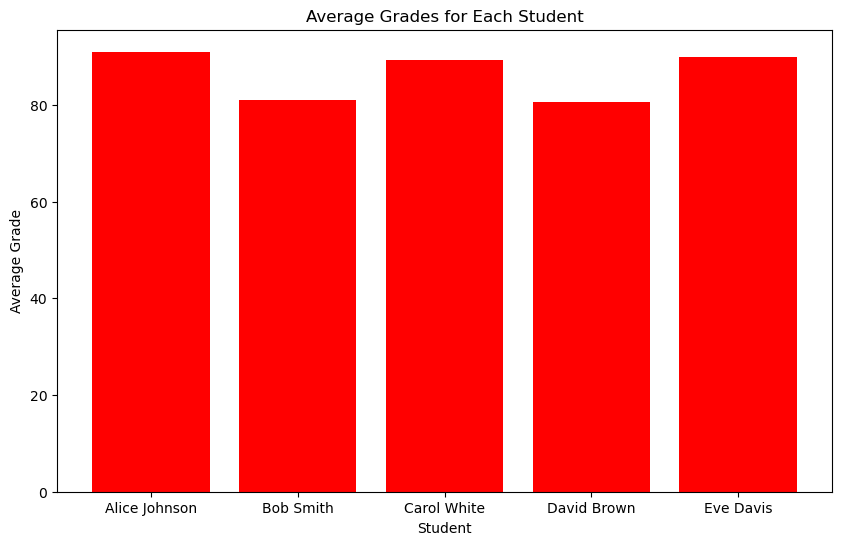

In [49]:
average_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean()
student_names = average_grades.index.get_level_values(0) + " " + average_grades.index.get_level_values(1)

plt.figure(figsize=(10,6))
plt.bar(student_names, average_grades, color='red')
plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.show()

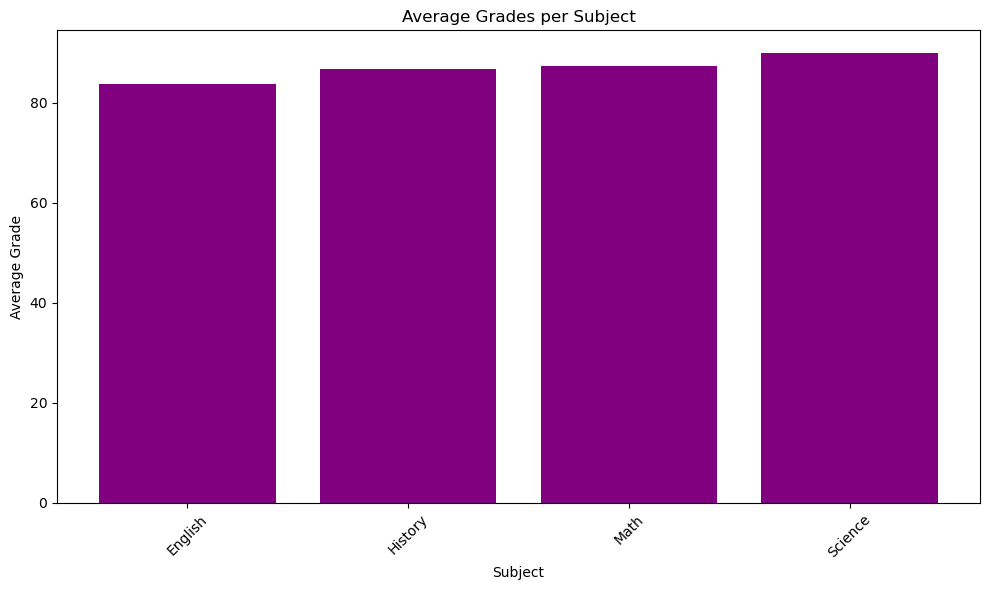

In [52]:
average_subject_grades = combined_df.groupby('subject')['grade'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_subject_grades.index, average_subject_grades, color='purple')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades per Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()